In [1]:
# 1. Get essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from vnstock import *

Observations:  1391


<Axes: xlabel='Time'>

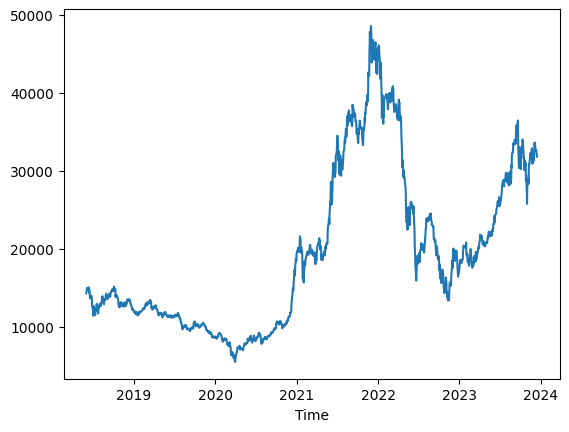

In [2]:
#2. Fetch data and visualize
SSI = stock_historical_data(symbol = "SSI", start_date="2018-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(SSI['Close']))
SSI
SSI["Close"].plot()

In [3]:
# Preprocessing
SSI['Lag'] = np.arange(len(SSI.index))
SSI = SSI[['Close', 'Lag']]
SSI

SSI = pd.DataFrame(SSI)
SSI.set_index("Lag", inplace= True)
SSI

,Close
Lag,
0,14270
1,14730
2,14770
3,14950
4,14700
...,...
1386,32700
1387,32600
1388,32000


In [10]:
#3. Slit the data into train : test with ratio 8:2
train_size = int(0.6 * len(SSI))
test_size = int(0.4 * len(SSI))

train_data = SSI[:train_size]
test_data = SSI[train_size:]

In [11]:
#4. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [12]:
# 5. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)
y_pred

array([[20985.01328301],
       [21001.43246789],
       [21017.85165276],
       [21034.27083764],
       [21050.69002252],
       [21067.10920739],
       [21083.52839227],
       [21099.94757715],
       [21116.36676202],
       [21132.7859469 ],
       [21149.20513177],
       [21165.62431665],
       [21182.04350153],
       [21198.4626864 ],
       [21214.88187128],
       [21231.30105616],
       [21247.72024103],
       [21264.13942591],
       [21280.55861079],
       [21296.97779566],
       [21313.39698054],
       [21329.81616542],
       [21346.23535029],
       [21362.65453517],
       [21379.07372004],
       [21395.49290492],
       [21411.9120898 ],
       [21428.33127467],
       [21444.75045955],
       [21461.16964443],
       [21477.5888293 ],
       [21494.00801418],
       [21510.42719906],
       [21526.84638393],
       [21543.26556881],
       [21559.68475368],
       [21576.10393856],
       [21592.52312344],
       [21608.94230831],
       [21625.36149319],


In [13]:
# 6. 60 days prediction
last_index =  SSI.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[[30130.49925915]
 [30146.91844403]
 [30163.33762891]
 [30179.75681378]
 [30196.17599866]
 [30212.59518354]
 [30229.01436841]
 [30245.43355329]
 [30261.85273817]
 [30278.27192304]
 [30294.69110792]
 [30311.1102928 ]
 [30327.52947767]
 [30343.94866255]
 [30360.36784742]
 [30376.7870323 ]
 [30393.20621718]
 [30409.62540205]
 [30426.04458693]
 [30442.46377181]
 [30458.88295668]
 [30475.30214156]
 [30491.72132644]
 [30508.14051131]
 [30524.55969619]
 [30540.97888106]
 [30557.39806594]
 [30573.81725082]
 [30590.23643569]
 [30606.65562057]
 [30623.07480545]
 [30639.49399032]
 [30655.9131752 ]
 [30672.33236008]
 [30688.75154495]
 [30705.17072983]
 [30721.5899147 ]
 [30738.00909958]
 [30754.42828446]
 [30770.84746933]
 [30787.26665421]
 [30803.68583909]
 [30820.10502396]
 [30836.52420884]
 [30852.94339372]
 [30869.36257859]
 [30885.78176347]
 [30902.20094834]
 [30918.62013322]
 [30935.0393181 ]
 [30951.45850297]
 [30967.87768785]
 [30984.29687273]

In [14]:
# 7. Evaluation
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing RMSE: 10225.630814791772
Testing MAPE: 28.922337136048494
Testing MAE: 7934.995685964845


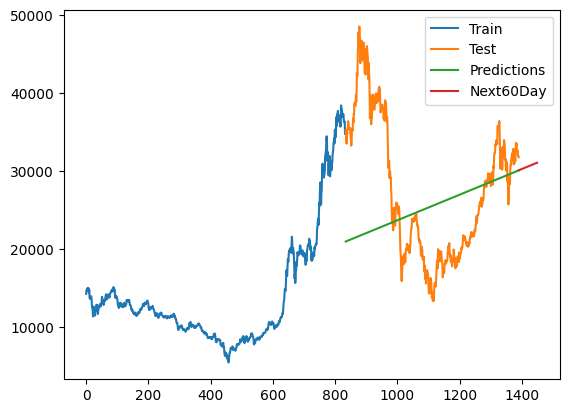

In [15]:
# 8.Visualize the result
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test','Predictions', 'Next60Day'])
plt.show()